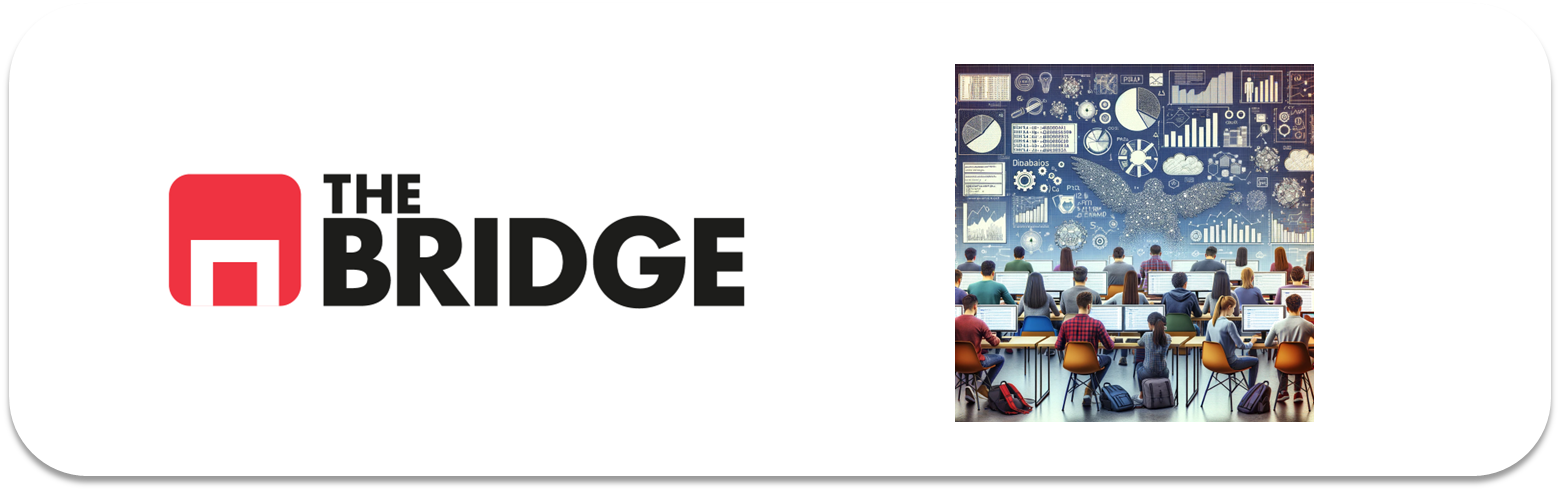

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [146]:
df = pd.read_csv(r"C:\Users\salva\Desktop\Data Science The Bridge\Data Science clase GitHub\DATA ESTEFY 2025\ONLINE_DS_THEBRIDGE_ESTEFY\Sprint_10\Unidad_01\Practica_Obligatoria\data\hard_to_find\obligatoria_hard.csv", delimiter = "|")
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8 

In [148]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

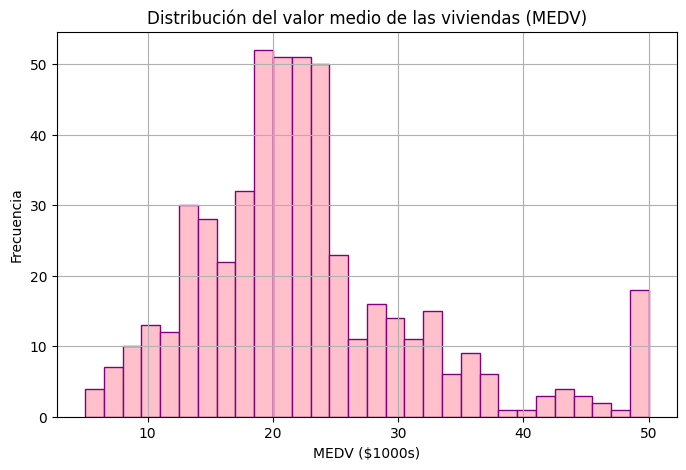

In [150]:
plt.figure(figsize=(8,5))
plt.hist(y, bins=30, color="pink", edgecolor="purple")
plt.title("Distribución del valor medio de las viviendas (MEDV)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [152]:
correlacion = df.corr()

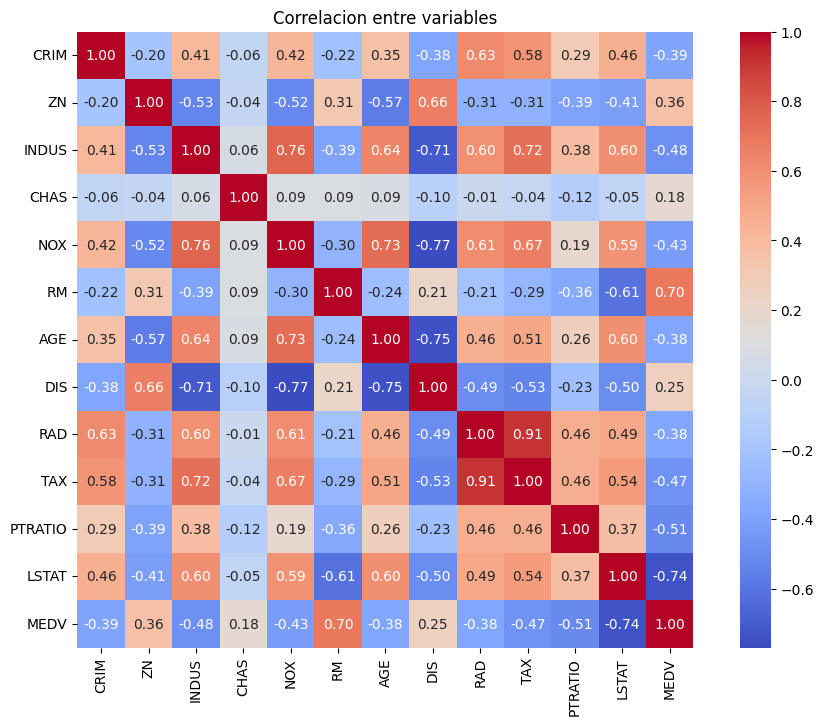

In [154]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlacion entre variables")
plt.show()

In [155]:
features = ["RM", "LSTAT", "NOX"]
X = df[features]
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

RM  LSTAT     NOX
477  5.304  24.91  0.6140
15   5.834   8.47  0.5380
332  6.031   7.83  0.4379
423  6.103  23.29  0.6140
19   5.727  11.28  0.5380

In [158]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)   
print(mae, rmse, r2)

3.89772636193565 5.583330115873147 0.5749084004753429


In [162]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="pink", edgecolor="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Valor Real (MEDV)")
plt.ylabel("Valor Predicho")
plt.title("Comparación entre valores reales y predichos")
plt.grid(True)
plt.show()

In [164]:
#RIDGE
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(mae_ridge, rmse_ridge, r2_ridge)

3.897522358735249 5.580546064188033 0.5753322270795638


In [166]:
#LASSO
modelo_lasso = Lasso(alpha=1.0)
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(mae_lasso, rmse_lasso, r2_lasso)

3.9568892146364 5.5019719992109035 0.5872066791655821


In [168]:
#ELASTIC
modelo_elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelo_elastic.fit(X_train, y_train)
y_pred_elastic = modelo_elastic.predict(X_test)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)
print(mae_elastic, rmse_elastic, r2_elastic)

4.029541438635311 5.5696954929962255 0.5769820327299496


In [170]:
modelos = ["Lineal", "Ridge", "Lasso", "ElasticNet"]
mae_vals = [mae, mae_ridge, mae_lasso, mae_elastic]
rmse_vals = [rmse, rmse_ridge, rmse_lasso, rmse_elastic]
r2_vals = [r2, r2_ridge, r2_lasso, r2_elastic]

plt.figure(figsize=(14, 4))

# MAE
plt.subplot(1, 3, 1)
plt.bar(modelos, mae_vals, color="pink")
plt.title("MAE (Error Absoluto Medio)")
plt.ylabel("Miles de $")
plt.grid(True)

# RMSE
plt.subplot(1, 3, 2)
plt.bar(modelos, rmse_vals, color="purple")
plt.title("RMSE (Raíz del Error Cuadrático Medio)")
plt.grid(True)

# R2
plt.subplot(1, 3, 3)
plt.bar(modelos, r2_vals, color="lightsalmon")
plt.title("R² (Precisión del Modelo)")
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()

Me quedo con **Lasso** porque fue el que tuvo el mayor precision y ayudo a usar solo las variables mas importantes para mi.
